# Silence Threshold

We use this notebook to tune the threshhold to set for silence on the LJ Speech dataset.

In [59]:
import re
import sys

# Setup the "PYTHONPATH"
sys.path.insert(0, '../')

In [2]:
from src.datasets import lj_speech_dataset
data = lj_speech_dataset(directory='../data', verbalize=False)

Wav: ../data/LJSpeech-1.1/wavs/LJ001-0013.wav
Diff: [0.06034483]
Max Signal: [0.00585938]
Start: 232
Signal:


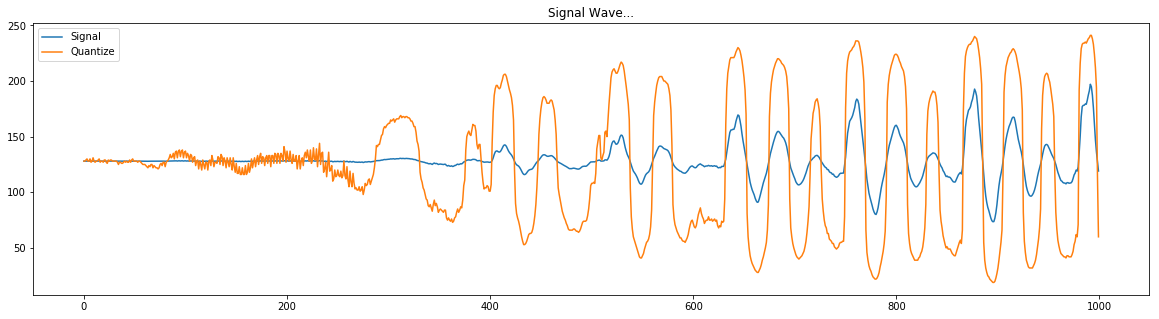

Wav: ../data/LJSpeech-1.1/wavs/LJ001-0018.wav
Diff: [2.23529412]
Max Signal: [0.00601196]
Start: 17
Signal:


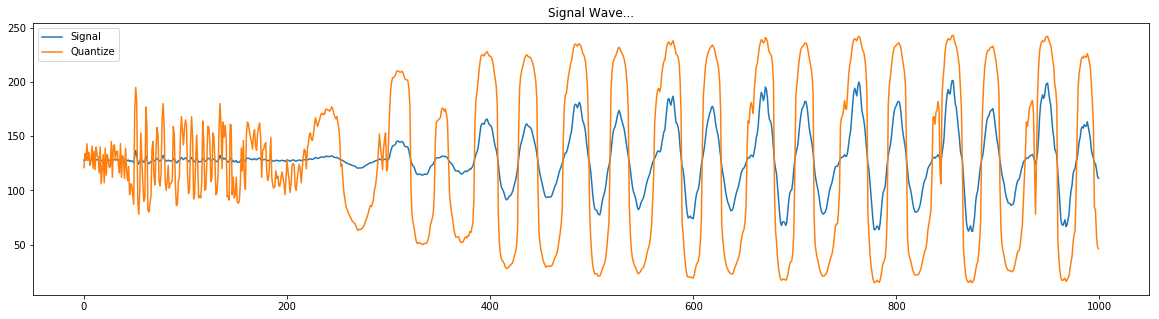

Wav: ../data/LJSpeech-1.1/wavs/LJ001-0173.wav
Diff: [3.76470588]
Max Signal: [0.00338745]
Start: 17
Signal:


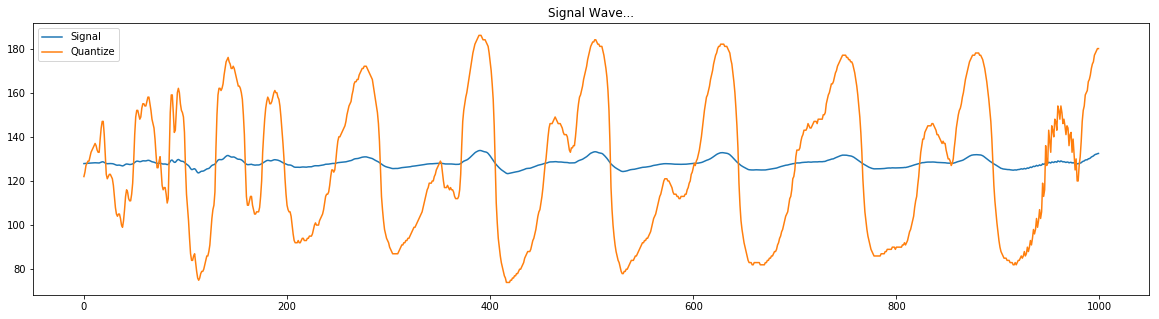

Wav: ../data/LJSpeech-1.1/wavs/LJ001-0185.wav
Diff: [11.75]
Max Signal: [0.00271606]
Start: 12
Signal:


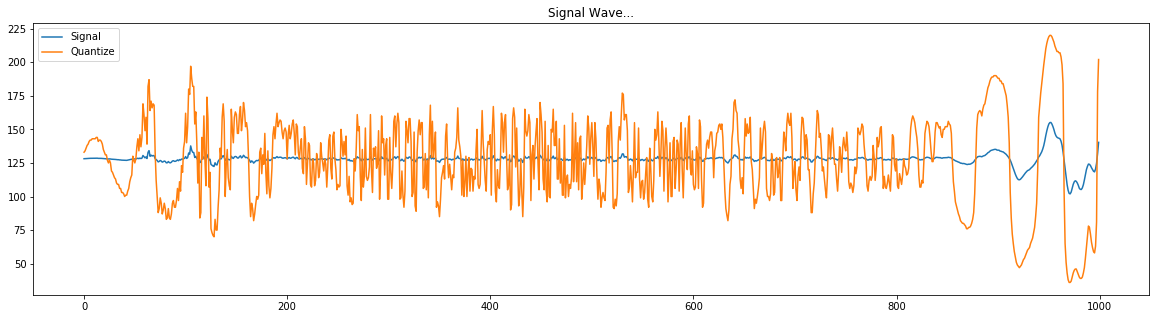

Wav: ../data/LJSpeech-1.1/wavs/LJ021-0179.wav
Diff: [13.07692308]
Max Signal: [0.00079346]
Start: 26
Signal:


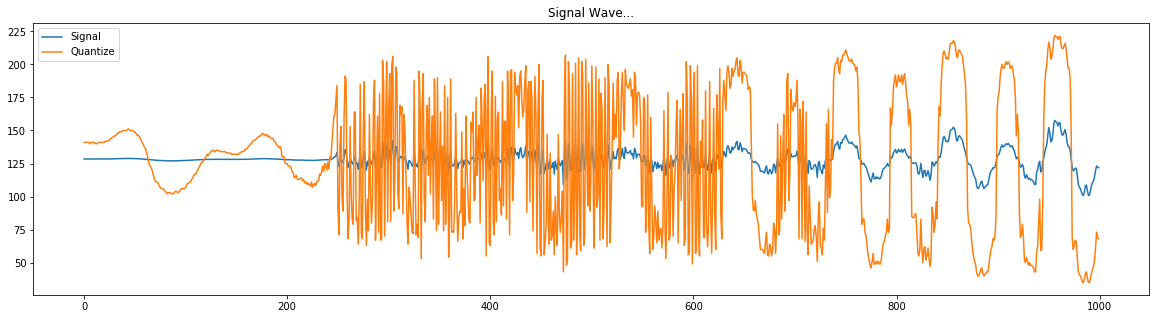

In [58]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from src.preprocess import _read_audio
from src.preprocess import mu_law_quantize


def trim_silence(quantized, silence_threshold=15):
    for start in range(quantized.size):
        if abs(quantized[start] - 128) > silence_threshold:
            break
            
    for end in range(quantized.size - 1, 1, -1):
        if abs(quantized[end] - 128) > silence_threshold:
            break

    return start, end

max_diff = 0

for row in data:
    signal, sample_rate = _read_audio(row['wav'])
    quantize = mu_law_quantize(signal)
    start, end = trim_silence(quantize)
    if start > 10:
        diff = sum(quantize[:start] - 128) / start
        if diff >= max_diff:
            max_diff = diff
            print('Wav:', row['wav'])
            print('Diff:', diff)
            print('Max Signal:', max(signal[:start]) - min(signal[:start]))
            print('Start:', start)
            print('Signal:')
            plt.figure(figsize=(20,5))
            plt.title('Signal Wave...')
            plt.plot(((signal[:1000] + 1) / 2 * 256), label='Signal')
            plt.plot(quantize[:1000], label='Quantize')
            plt.legend()
            plt.show()